# Feature Extractor Data Augmentation

Lo scopo di questo Notebook Python è di eseguire una breve analisi sui dati usati per addestrare l'estrattore delle feature nel modello joint embeddings per il classificatore VQA.

In [1]:
from dataset import prepare_feature_extractor_data
from util import format_float as f
import matplotlib.pyplot as plt
import numpy as np
import os
from dotenv import load_dotenv

load_dotenv()

c:\Users\emanu\Desktop\Tesi\kvasir-vqa\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
dataset = prepare_feature_extractor_data(os.getenv('FEATURE_EXTRACTOR_CSV'))

N = dataset.shape[0]
labels = list(set(dataset["label"]))

dataset.head()

,path,label,code,bbox
7295,./data/hyper-kvasir/labeled-images/lower-gi-tr...,dyed-lifted-polyps,661ef9d8-cbd1-4957-ace8-f855677c68a6,[]
215,./data/kvasir-instrument/images,instrument,ckcx9hbyj001i3b5ynq5k2r5n,"[471, 912, 59, 452]"
1838,./data/hyper-kvasir/labeled-images/lower-gi-tr...,cecum,1f9c0ea7-e959-4637-a91e-174033ea009a,[]
3769,./data/hyper-kvasir/labeled-images/lower-gi-tr...,polyp,a78b31af-6ad7-42d3-a852-fd660312757d,[]
6878,./data/hyper-kvasir/labeled-images/lower-gi-tr...,impacted-stool,bf089004-a246-4523-8b2e-8a30b9c0873c,[]


In [3]:
dataset.describe()

,path,label,code,bbox
count,12353,12353,12353,12353
unique,25,24,11252,1692
top,./data/hyper-kvasir/labeled-images/lower-gi-tr...,polyp,4604cf0d-7992-48a4-baba-51768bcf0469,[]
freq,1148,2099,11,10662


I dati usati (combinazione del dataset Hyper Kvasir e Kvasir Instrument) arrivano a circa immagini etichettate, con la presenza di bounding box per quelle che interessano la categoria dei polipi e degli strumenti.

Il dataset non è generalmente bilanciato per un problema intrinseco dei dati, ovvero il fatto che alcuni ritrovamenti e patologie appaiono più frequentemente di altri.

In [4]:
labels_count = {}

for label in labels:
    labels_count[label] = len(dataset[dataset['label'] == label])

labels_count = dict(sorted(labels_count.items(), key=lambda item: item[1], reverse=True))

for l in labels_count:
    print(f"Label: {l}, n: {labels_count[l]}/{N} - {f(labels_count[l]/N * 100)}%")

Label: polyp, n: 2099/12353 - 16.99%
Label: bbps-2-3, n: 1148/12353 - 9.29%
Label: cecum, n: 1009/12353 - 8.17%
Label: dyed-lifted-polyps, n: 1002/12353 - 8.11%
Label: pylorus, n: 999/12353 - 8.09%
Label: dyed-resection-margins, n: 989/12353 - 8.01%
Label: z-line, n: 932/12353 - 7.54%
Label: retroflex-stomach, n: 764/12353 - 6.18%
Label: bbps-0-1, n: 646/12353 - 5.23%
Label: instrument, n: 620/12353 - 5.02%
Label: ulcerative-colitis-grade-2, n: 443/12353 - 3.59%
Label: esophagitis-a, n: 403/12353 - 3.26%
Label: retroflex-rectum, n: 391/12353 - 3.17%
Label: esophagitis-b-d, n: 260/12353 - 2.10%
Label: ulcerative-colitis-grade-1, n: 201/12353 - 1.63%
Label: ulcerative-colitis-grade-3, n: 133/12353 - 1.08%
Label: impacted-stool, n: 131/12353 - 1.06%
Label: barretts-short-segment, n: 53/12353 - 0.43%
Label: barretts, n: 41/12353 - 0.33%
Label: ulcerative-colitis-grade-0-1, n: 35/12353 - 0.28%
Label: ulcerative-colitis-grade-2-3, n: 28/12353 - 0.23%
Label: ulcerative-colitis-grade-1-2, n: 1

A causa di una presenza di sbilanciamento nella distribuzione dei dati tra le classi, si è scelto di fare data augmentation sulle classi con presenza più bassa, in particolare su quelle classi con meno di 300 campioni presenti.

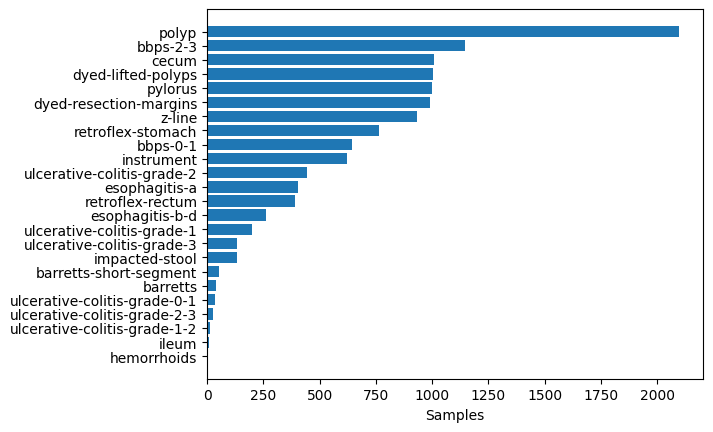

In [5]:
labels = labels_count.keys()
values = labels_count.values()

x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.barh(x, values, align='center')

ax.set_yticks(x, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Samples")

plt.show()

Il codice per la data augmentation è presente nel file dataset.py, sotto il metodo __prepare_feautre_extractor_data__.

Facciamo una veloce analisi dei dati come fatta subito prima ma per il dataset comprensivo di immagini aumentate.

In [6]:
aug_dataset = prepare_feature_extractor_data(os.getenv('FEATURE_EXTRACTOR_CSV_AUG'), aug=True)

aug_N = aug_dataset.shape[0]
aug_labels = list(set(aug_dataset["label"]))

aug_dataset.head()

,path,label,code,bbox
7883,./data/hyper-kvasir/labeled-images/lower-gi-tr...,dyed-lifted-polyps,f8a7bdae-0eec-4327-811f-e3af3bc259fb,[]
6418,./data/hyper-kvasir/labeled-images/lower-gi-tr...,bbps-2-3,abe1c5f9-cb52-4cdf-b58e-36c19a34c5d6,[]
4814,./data/hyper-kvasir/labeled-images/lower-gi-tr...,ulcerative-colitis-grade-2,f9cc629c-79d0-45e6-8801-491a7869f5fd,[]
162,./data/augmentation,ulcerative-colitis-grade-1-2,75af7bcb-29ac-4cbf-9cb7-d818b2e44f08-aug-23,[]
2366,./data/augmentation,impacted-stool,70fa2ca9-e08e-43c1-9511-2afea0aa4839-aug-2,[]


In [7]:
aug_dataset.describe()

,path,label,code,bbox
count,16250,16250,16250,16250
unique,26,24,15149,1692
top,./data/augmentation,polyp,4604cf0d-7992-48a4-baba-51768bcf0469,[]
freq,3897,2099,11,14559


In [8]:
aug_labels_count = {}

for label in aug_labels:
    aug_labels_count[label] = len(aug_dataset[aug_dataset['label'] == label])

aug_labels_count = dict(sorted(aug_labels_count.items(), key=lambda item: item[1], reverse=True))

for l in aug_labels_count:
    print(f"Label: {l}, n: {aug_labels_count[l]}/{aug_N} - {f(aug_labels_count[l]/aug_N * 100)}%")

Label: polyp, n: 2099/16250 - 12.92%
Label: bbps-2-3, n: 1148/16250 - 7.06%
Label: cecum, n: 1009/16250 - 6.21%
Label: dyed-lifted-polyps, n: 1002/16250 - 6.17%
Label: pylorus, n: 999/16250 - 6.15%
Label: dyed-resection-margins, n: 989/16250 - 6.09%
Label: z-line, n: 932/16250 - 5.74%
Label: esophagitis-b-d, n: 780/16250 - 4.80%
Label: retroflex-stomach, n: 764/16250 - 4.70%
Label: bbps-0-1, n: 646/16250 - 3.98%
Label: instrument, n: 620/16250 - 3.82%
Label: ulcerative-colitis-grade-1, n: 603/16250 - 3.71%
Label: ulcerative-colitis-grade-3, n: 532/16250 - 3.27%
Label: impacted-stool, n: 524/16250 - 3.22%
Label: ulcerative-colitis-grade-2, n: 443/16250 - 2.73%
Label: esophagitis-a, n: 403/16250 - 2.48%
Label: retroflex-rectum, n: 391/16250 - 2.41%
Label: barretts-short-segment, n: 371/16250 - 2.28%
Label: barretts, n: 369/16250 - 2.27%
Label: ulcerative-colitis-grade-0-1, n: 350/16250 - 2.15%
Label: ulcerative-colitis-grade-2-3, n: 336/16250 - 2.07%
Label: ulcerative-colitis-grade-1-2, 

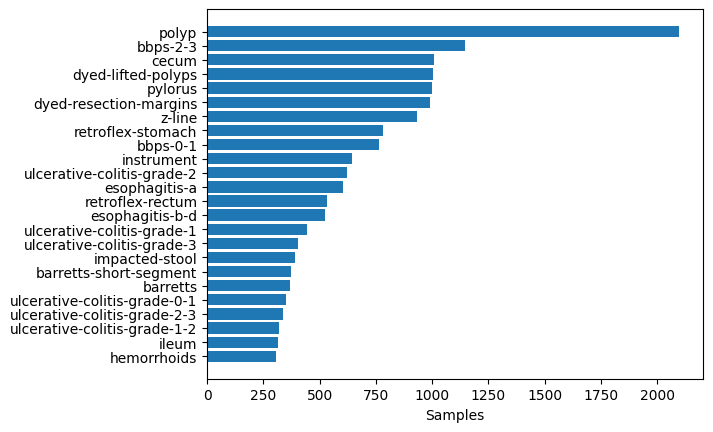

In [9]:
aug_values = aug_labels_count.values()

x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.barh(x, aug_values, align='center')

ax.set_yticks(x, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Samples")

plt.show()

Dopo aver fatto data augmentation applicando piccole rotazioni casuali alle immagini e ribaltamenti orizzontali, ci ritroviamo di fronte a un insieme più bilanciato ed omogeneo per l'addestramento.